In [1]:
import os
import sys
sys.path.append('common')
import util, audio_preprocessing

import shutil
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard
from matplotlib import pyplot as plt
%matplotlib inline
from cyclic_lr import CyclicLR

from dataset import SingleDataset, MultiDataset
from model import model_mlt_cnn_alexnet

TRY = 'MIXA'
LOG_DIR = './%slog' % TRY
SCD_PREFIX = 'scd_'
USD_PREFIX = 'usd_'

batch_size = 32
epochs = 300

scd = SingleDataset(SCD_PREFIX,
                   util.load_txt_list(os.path.join('.', SCD_PREFIX+'classes.txt')),
                   batch_size)
usd = SingleDataset(USD_PREFIX,
                   ['air_conditioner',  'car_horn', 'children_playing', 'dog_bark', 'drilling',
                    'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music'],
                   batch_size)

Using TensorFlow backend.


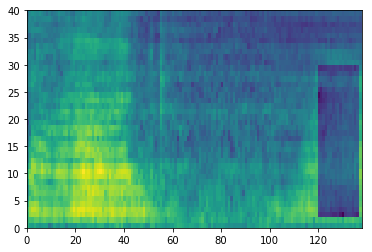

In [2]:
multi = MultiDataset([scd, usd], x_mix_ratio=[0.55, 0.45], mix_randomness=0.3)

# Confirmation
def plot_dataset(X, n=1):
    for i in range(n):
        x = X[i]
        plt.pcolormesh(x[..., -1])
        plt.show()
X = next(multi.train_generator)[0]
plot_dataset(X)

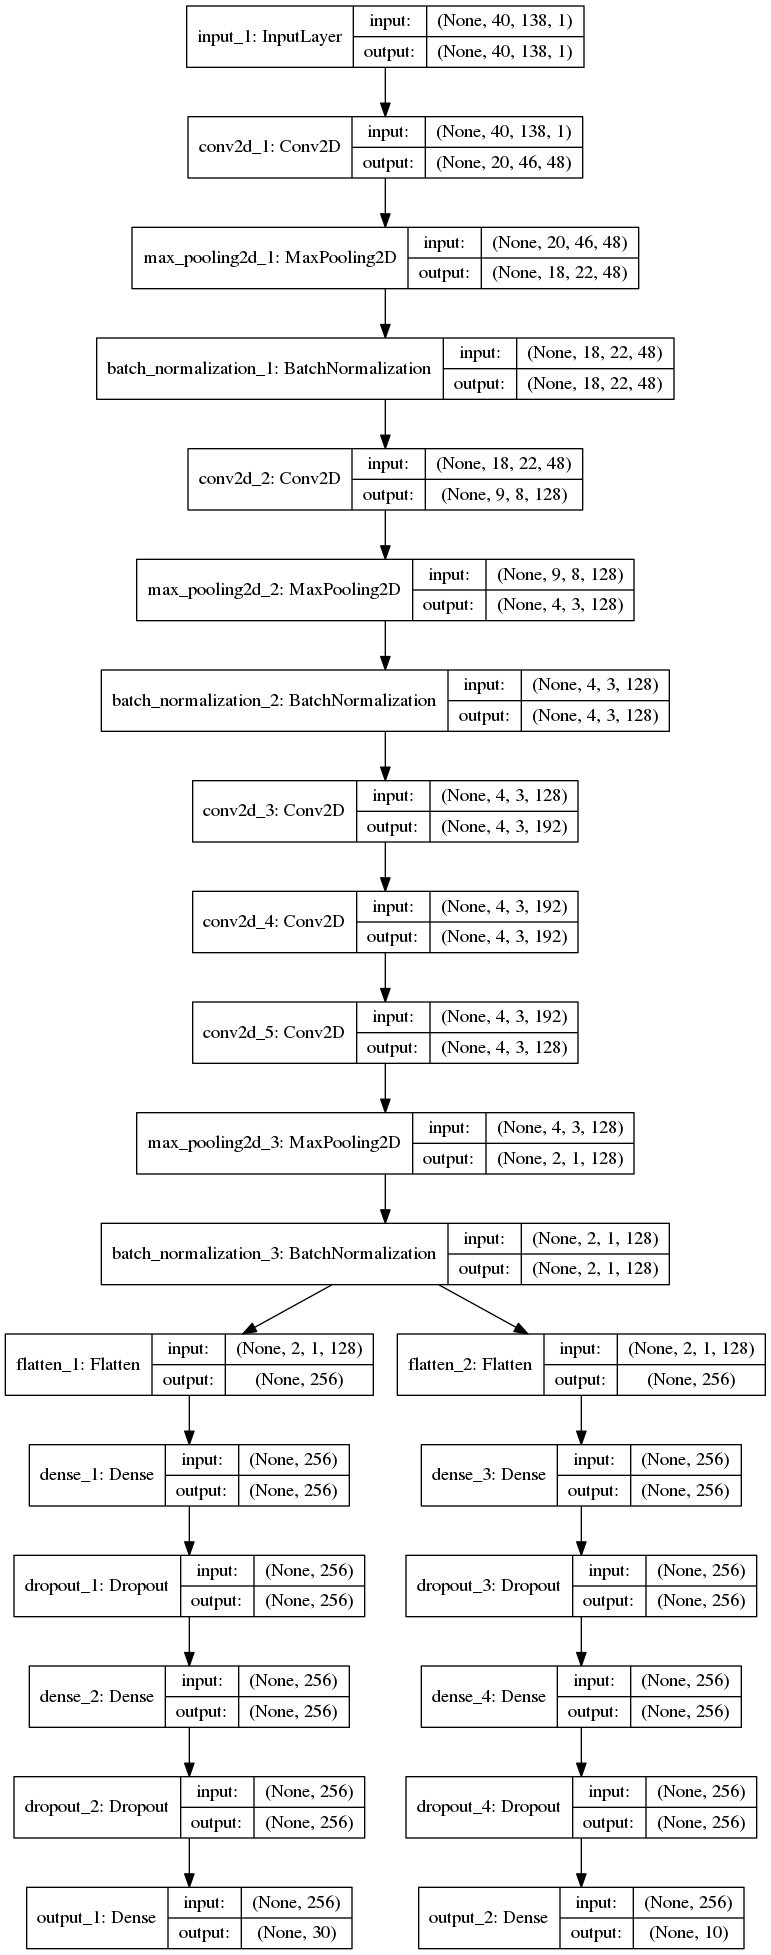

In [3]:
model = model_mlt_cnn_alexnet(multi.input_shape(), multi.ys_classes())
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='structure%s.png' % TRY, show_shapes=True)
from IPython.display import Image
Image(filename='structure%s.png' % TRY) 

In [ ]:
callbacks = [
    CyclicLR(base_lr=0.00007, max_lr=0.0007, step_size=multi.train_steps_per_epoch, mode='triangular'),
    ModelCheckpoint('model%s.h5' % TRY,
                monitor='val_output_1_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
     keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)
]

# Clean up log
shutil.rmtree(LOG_DIR, ignore_errors=True)

model.fit_generator(multi.train_generator,
                    steps_per_epoch=multi.train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=multi.valid_generator, 
                    validation_steps=multi.valid_steps_per_epoch,
                    callbacks=callbacks)

Epoch 1/300
1595/1596 [============================>.] - ETA: 0s - loss: 3.1063 - output_1_loss: 1.9951 - output_2_loss: 1.1111 - output_1_acc: 0.0340 - output_2_acc: 0.1300
Epoch 00001: val_output_1_acc improved from -inf to 0.04622, saving model to modelMIXA.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 3.1067 - output_1_loss: 1.9954 - output_2_loss: 1.1113 - output_1_acc: 0.0340 - output_2_acc: 0.1300 - val_loss: 2.8398 - val_output_1_loss: 1.8702 - val_output_2_loss: 0.9697 - val_output_1_acc: 0.0462 - val_output_2_acc: 0.2382
Epoch 2/300
1594/1596 [============================>.] - ETA: 0s - loss: 2.9033 - output_1_loss: 1.8922 - output_2_loss: 1.0111 - output_1_acc: 0.0385 - output_2_acc: 0.1745
Epoch 00002: val_output_1_acc improved from 0.04622 to 0.06138, saving model to modelMIXA.h5
1596/1596 [==============================] - 72s 45ms/step - loss: 2.9046 - output_1_loss: 1.8930 - output_2_loss: 1.0117 - output_1_acc: 0.0384 - output_2_acc: 0.1745 - va

Epoch 16/300
1595/1596 [============================>.] - ETA: 0s - loss: 2.7112 - output_1_loss: 1.8039 - output_2_loss: 0.9073 - output_1_acc: 0.1127 - output_2_acc: 0.3507
Epoch 00016: val_output_1_acc improved from 0.26605 to 0.28582, saving model to modelMIXA.h5
1596/1596 [==============================] - 72s 45ms/step - loss: 2.7117 - output_1_loss: 1.8043 - output_2_loss: 0.9075 - output_1_acc: 0.1127 - output_2_acc: 0.3508 - val_loss: 2.4004 - val_output_1_loss: 1.5874 - val_output_2_loss: 0.8131 - val_output_1_acc: 0.2858 - val_output_2_acc: 0.3630
Epoch 17/300
1595/1596 [============================>.] - ETA: 0s - loss: 2.6762 - output_1_loss: 1.7816 - output_2_loss: 0.8945 - output_1_acc: 0.1231 - output_2_acc: 0.3542
Epoch 00017: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 2.6756 - output_1_loss: 1.7813 - output_2_loss: 0.8943 - output_1_acc: 0.1231 - output_2_acc: 0.3542 - val_loss: 2.4104 - val_output_1_loss: 1.6012

1594/1596 [============================>.] - ETA: 0s - loss: 2.5489 - output_1_loss: 1.6620 - output_2_loss: 0.8870 - output_1_acc: 0.2395 - output_2_acc: 0.3772
Epoch 00031: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 2.5487 - output_1_loss: 1.6618 - output_2_loss: 0.8868 - output_1_acc: 0.2394 - output_2_acc: 0.3773 - val_loss: 2.0302 - val_output_1_loss: 1.2300 - val_output_2_loss: 0.8003 - val_output_1_acc: 0.5243 - val_output_2_acc: 0.4002
Epoch 32/300
1594/1596 [============================>.] - ETA: 0s - loss: 2.5400 - output_1_loss: 1.6557 - output_2_loss: 0.8842 - output_1_acc: 0.2428 - output_2_acc: 0.3782
Epoch 00032: val_output_1_acc improved from 0.54250 to 0.57242, saving model to modelMIXA.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 2.5409 - output_1_loss: 1.6564 - output_2_loss: 0.8845 - output_1_acc: 0.2428 - output_2_acc: 0.3783 - val_loss: 1.9238 - val_output_1_loss: 1.1187 - val_output

1594/1596 [============================>.] - ETA: 0s - loss: 2.4001 - output_1_loss: 1.5391 - output_2_loss: 0.8610 - output_1_acc: 0.3255 - output_2_acc: 0.3881
Epoch 00046: val_output_1_acc improved from 0.70647 to 0.72894, saving model to modelMIXA.h5
1596/1596 [==============================] - 73s 45ms/step - loss: 2.4016 - output_1_loss: 1.5400 - output_2_loss: 0.8616 - output_1_acc: 0.3255 - output_2_acc: 0.3880 - val_loss: 1.6244 - val_output_1_loss: 0.8183 - val_output_2_loss: 0.8062 - val_output_1_acc: 0.7289 - val_output_2_acc: 0.3995
Epoch 47/300
1594/1596 [============================>.] - ETA: 0s - loss: 2.3891 - output_1_loss: 1.5276 - output_2_loss: 0.8615 - output_1_acc: 0.3360 - output_2_acc: 0.3912
Epoch 00047: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 2.3908 - output_1_loss: 1.5286 - output_2_loss: 0.8622 - output_1_acc: 0.3359 - output_2_acc: 0.3911 - val_loss: 1.6818 - val_output_1_loss: 0.8711 - val_output

## Evaluate per dataset

In [8]:
model.load_weights('model%s.h5' % TRY)
multi.evaluate_by_datasets(model)

Evaluating scd_dataset
6798/6798 [==============================] - 12s 2ms/step
 = 0.9236540158870256
Evaluating usd_dataset
990/990 [==============================] - 1s 1ms/step
 = 0.592929292929293
Accuracy with scd_dataset = 0.923654
Accuracy with usd_dataset = 0.592929


[0.9236540158870256, 0.592929292929293]

## Evaluate by mixed dataset

In [12]:
model.load_weights('model%s.h5' % TRY)
multi = MultiDataset([scd, usd], x_mix_ratio=[0.55, 0.45], mix_randomness=0.0)
results = model.evaluate_generator(multi.valid_generator, steps=multi.valid_steps_per_epoch)
print(model.metrics_names, results)

['loss', 'output_1_loss', 'output_2_loss', 'output_1_acc', 'output_2_acc'] [1.0567413309491447, 0.40796350181193575, 0.6487778284109585, 0.8549049820236261, 0.5472521828454032]


[[ 2 23 11  1  9  2 21 13 23 21 18 12  6 11  6  9  9  4  4  3  5 15  6  4
  25 28  9 16 11 14 15 23]
 [ 4  5  4  4  8  3  5  3  0  7  9  3  3  9  5  4  0  3  9  9  5  0  7  9
   3  3  0  2  9  5  5  9]
 [ 6 21 11  1  9 29  9 26 23 21 18 13  6 23  5  9  9  4  4  2  5 12  9  4
  10 28  9 16 14 14 15 15]
 [ 4  5  4  4  2  3  0  9  3  5  9  4  3  2  2  4  3  4  9  9  9  0  7  0
   3  3  9  2  7  5  0  7]]


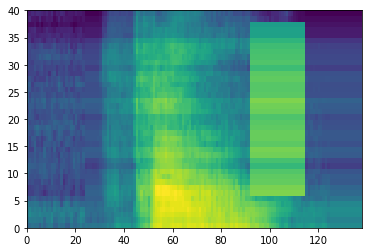

In [10]:
Xs, yss = next(multi.train_generator)
multi_preds = model.predict(Xs)
print(np.array([[np.argmax(pred) for pred in preds] for preds in multi_preds] + [[np.argmax(y) for y in ys] for ys in yss]))
plot_dataset(Xs)